Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR

lucas.ferro.2000@hotmail.com

#Tokenização e normalização do corpus

In [ ]:
import nltk

In [ ]:
# Instalação do NLTK
# !pip install nltk==3.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.6.2 which is incompatible.


In [ ]:
# Importação de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# pd.set_option('max_columns', None)
# pd.set_option('max_colwidth', None)

In [ ]:
# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [ ]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',

In [ ]:
stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 '

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
PATH = '/content/sample_data/corpus/'

In [ ]:
with open(PATH + 'corpus', 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

NameError: name 'PATH' is not defined

In [ ]:
type(filecontent)

str

In [ ]:
len(filecontent) # número de tokens

4518

## Transformando o texto completo em sentenças (tokenizer do NLTK)

In [ ]:
sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

In [ ]:
sentencas

['A importância histórica do problema da parada reside no fato de que foi um dos primeiros problemas a ser provado indecidível.',
 '(A prova de Turing foi lançada em maio de 1936, enquanto a prova de Alonzo Church da indecidibilidade de um problema no cálculo lambda já havia sido lançada em abril de 1936).',
 'Subsequentemente, muitos outros problemas foram descritos; o método típico de provar que um problema é indecidível é a técnica de redução.',
 'Para isso, o cientista da computação mostra que se uma solução para o novo problema foi encontrada, ela poderia ser usada para decidir um problema indecidível (transformando instâncias do problema indecidível em instâncias do novo problema).',
 'Como sabemos de antemão que nenhum método pode decidir o problema antigo, então nenhum método pode decidir o problema novo também.',
 'Uma consequência da indecidibilidade do problema da parada é que não pode existir um algoritmo genérico que decida se um dado enunciado sobre os números naturais é 

In [ ]:
index = 1
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: A importância histórica do problema da parada reside no fato de que foi um dos primeiros problemas a ser provado indecidível.
2: (A prova de Turing foi lançada em maio de 1936, enquanto a prova de Alonzo Church da indecidibilidade de um problema no cálculo lambda já havia sido lançada em abril de 1936).
3: Subsequentemente, muitos outros problemas foram descritos; o método típico de provar que um problema é indecidível é a técnica de redução.
4: Para isso, o cientista da computação mostra que se uma solução para o novo problema foi encontrada, ela poderia ser usada para decidir um problema indecidível (transformando instâncias do problema indecidível em instâncias do novo problema).
5: Como sabemos de antemão que nenhum método pode decidir o problema antigo, então nenhum método pode decidir o problema novo também.
6: Uma consequência da indecidibilidade do problema da parada é que não pode existir um algoritmo genérico que decida se um dado enunciado sobre os números naturais é verd

## Segmentação por quebra de linha e depois pelo tokenizer do NLTK

In [ ]:
sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [ ]:
index = 1
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: A importância histórica do problema da parada reside no fato de que foi um dos primeiros problemas a ser provado indecidível.
2: (A prova de Turing foi lançada em maio de 1936, enquanto a prova de Alonzo Church da indecidibilidade de um problema no cálculo lambda já havia sido lançada em abril de 1936).
3: Subsequentemente, muitos outros problemas foram descritos; o método típico de provar que um problema é indecidível é a técnica de redução.
4: Para isso, o cientista da computação mostra que se uma solução para o novo problema foi encontrada, ela poderia ser usada para decidir um problema indecidível (transformando instâncias do problema indecidível em instâncias do novo problema).
5: Como sabemos de antemão que nenhum método pode decidir o problema antigo, então nenhum método pode decidir o problema novo também.
6: Uma consequência da indecidibilidade do problema da parada é que não pode existir um algoritmo genérico que decida se um dado enunciado sobre os números naturais é verd

## Tokenização de cada sentença em palavras (tokenizer do NLTK)





In [ ]:
sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

1: ['A', 'importância', 'histórica', 'do', 'problema', 'da', 'parada', 'reside', 'no', 'fato', 'de', 'que', 'foi', 'um', 'dos', 'primeiros', 'problemas', 'a', 'ser', 'provado', 'indecidível', '.']
2: ['(', 'A', 'prova', 'de', 'Turing', 'foi', 'lançada', 'em', 'maio', 'de', '1936', ',', 'enquanto', 'a', 'prova', 'de', 'Alonzo', 'Church', 'da', 'indecidibilidade', 'de', 'um', 'problema', 'no', 'cálculo', 'lambda', 'já', 'havia', 'sido', 'lançada', 'em', 'abril', 'de', '1936', ')', '.']
3: ['Subsequentemente', ',', 'muitos', 'outros', 'problemas', 'foram', 'descritos', ';', 'o', 'método', 'típico', 'de', 'provar', 'que', 'um', 'problema', 'é', 'indecidível', 'é', 'a', 'técnica', 'de', 'redução', '.']
4: ['Para', 'isso', ',', 'o', 'cientista', 'da', 'computação', 'mostra', 'que', 'se', 'uma', 'solução', 'para', 'o', 'novo', 'problema', 'foi', 'encontrada', ',', 'ela', 'poderia', 'ser', 'usada', 'para', 'decidir', 'um', 'problema', 'indecidível', '(', 'transformando', 'instâncias', 'do', 'p

## Pre-processamento dos elementos tokenizados
A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.

In [ ]:
from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {texto}')
    index+=1


NameError: name 'sentencas_tokenizadas' is not defined

#NGramas

In [ ]:
len(sent_tokenizada_preprocessed)

27

In [ ]:
import os
ngram_value = 1
most_common_value = 100

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

NameError: name 'sent_tokenizada_preprocessed' is not defined

In [ ]:
index = 1
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

NameError: name 'flat_ngram_counts' is not defined

In [ ]:
len(ngram_list)

234

In [ ]:
common

In [ ]:
df_common.head(30)

In [ ]:
# Quantidade de palavras
len(flat_ngram_counts)

395

In [ ]:
# Quantidade de palavras únicas
len(ngram_list)

234

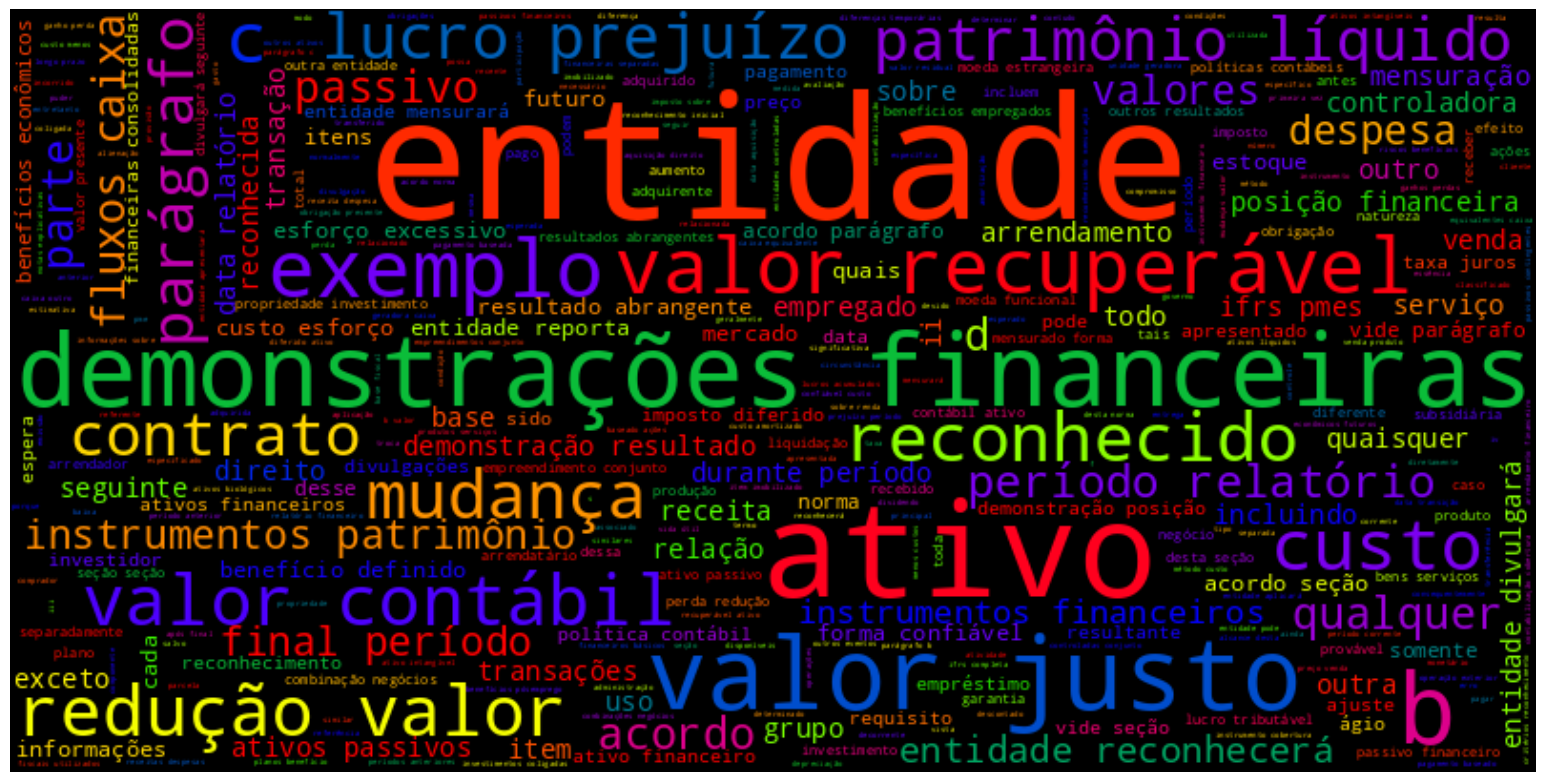

In [ ]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'prism'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

fazer a frequencia, Carlos